**<h1>Midterm Homework<h1>**
<h4>2012100249 SANGHYUK SON(孙祥赫)<br></h4>

The Excel file Credit Risk Data provides information about bank customers who had applied for loans. The data include the purpose of the loan, checking(Interest X) and savings account balances(Interest O), number of months as a customer of the bank, months employed, gender, marital status, age, housing status and number of years at current residence, job type, and credit-risk classification by the bank.(for Wk1-3)<br>

First, I will do pre-processing the data in order to analyze it. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline



mpl.rcParams['axes.unicode_minus'] = False

In [55]:
credit_df = pd.read_excel('Data_Sets.xlsx')

In [56]:
credit_df1 = credit_df

In [57]:
col_list=list(credit_df1.columns.values)

In [58]:
credit_df1.drop([col_list[13], col_list[14], col_list[15]], inplace=True, axis=1)


In [59]:
credit_df1 = credit_df1.shift(-1)

In [60]:
new_col_names = pd.Series(credit_df1.iloc[0])

In [61]:
new_col_names

Unnamed: 0             Entry Number
Credit Risk Data       Loan Purpose
Unnamed: 2                Checking 
Unnamed: 3                  Savings
Unnamed: 4          Months Customer
Unnamed: 5          Months Employed
Unnamed: 6                   Gender
Unnamed: 7           Marital Status
Unnamed: 8                      Age
Unnamed: 9                  Housing
Unnamed: 10                   Years
Unnamed: 11                     Job
Unnamed: 12             Credit Risk
Name: 0, dtype: object

In [62]:
credit_df1.columns = list(new_col_names)

In [63]:
credit_df1.columns

Index(['Entry Number', 'Loan Purpose', 'Checking ', 'Savings',
       'Months Customer', 'Months Employed', 'Gender', 'Marital Status', 'Age',
       'Housing', 'Years', 'Job', 'Credit Risk'],
      dtype='object')

In [64]:
credit_df1=credit_df1.drop(credit_df1.index[0])

In [68]:
credit_df1=credit_df1.drop(credit_df1.index[425])

In [69]:
credit_df1

,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
5,5,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,Small Appliance,497,0,7,51,M,Single,35,Other,4,Skilled,Low
422,422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High


In [70]:
credit_df1.isnull()

,Entry Number,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,False,False,False,False,False,False,False,False,False,False,False,False,False
422,False,False,False,False,False,False,False,False,False,False,False,False,False
423,False,False,False,False,False,False,False,False,False,False,False,False,False
424,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
credit_df1.isnull().sum()

Entry Number       0
Loan Purpose       0
Checking           0
Savings            0
Months Customer    0
Months Employed    0
Gender             0
Marital Status     0
Age                0
Housing            0
Years              0
Job                0
Credit Risk        0
dtype: int64

In [73]:
del credit_df1['Entry Number']

In [75]:
credit_df1

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
1,Small Appliance,0,739,13,12,M,Single,23,Own,3,Unskilled,Low
2,Furniture,0,1230,25,0,M,Divorced,32,Own,1,Skilled,High
3,New Car,0,389,19,119,M,Single,38,Own,4,Management,High
4,Furniture,638,347,13,14,M,Single,36,Own,2,Unskilled,High
5,Education,963,4754,40,45,M,Single,31,Rent,3,Skilled,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
421,Small Appliance,497,0,7,51,M,Single,35,Other,4,Skilled,Low
422,Furniture,0,0,31,53,M,Single,30,Own,4,Skilled,High
423,New Car,0,0,25,103,F,Divorced,28,Own,2,Skilled,High
424,New Car,0,712,16,6,F,Divorced,28,Own,2,Skilled,High


In [76]:
credit_df1['balance'] = credit_df1['Checking ']+credit_df1['Savings']

In [77]:
credit_df1['balance']

1       739
2      1230
3       389
4       985
5      5717
       ... 
421     497
422       0
423       0
424     712
425     912
Name: balance, Length: 425, dtype: object

### We're ready to explore the Data. 

Q1. Determine the number of customers with checking account balances less than $500

In [219]:
checking = credit_df1['Checking ']

In [220]:
#method 1, use for loop
count1=0;
for i in checking:
    if i<500:
        count1+=1
                
print("The number of customers with checking account balaces less than $500 is ", count1)


The number of customers with checking account balaces less than $500 is  312


In [221]:
#method 2, use conditional checking of dataframe, just one line code
count2=credit_df1[credit_df1['Checking ']  < 500].count()[0]

In [223]:
count2 #same with method1

312

Q2. Modify the spreadsheet using IF functions to include new columns, classifying the checking and savings account balances as "low" if the balance is less thatn $250, "medium" if between $250 but less than $2000, and "high" otherwise

In [101]:
balance

1       739
2      1230
3       389
4       985
5      5717
       ... 
421     497
422       0
423       0
424     712
425     912
Name: balance, Length: 425, dtype: object

In [157]:
#by using for loop, if conditional.
classify_list=[]
for i in balance:
    if i<250:
        classify_list.append("low")
    elif i<2000:
        classify_list.append("medium")
    else:
        classify_list.append("high")
        

In [166]:
classify_series1= pd.Series(classify_list)

In [191]:
#method 2
#by using pandas CUT function
bins = [-np.inf, 250, 2000, np.inf]
labels = ['low', 'medium', 'high']
classify_category=pd.cut(balance, bins, bins, labels)
classify_series2 = classify_category.astype('str')
print(classify_series2)

1      medium
2      medium
3      medium
4      medium
5        high
        ...  
421    medium
422       low
423       low
424    medium
425    medium
Name: balance, Length: 425, dtype: object


In [192]:
#first one is from index 0, second one is from index 1, 
#so I've just done two columns to start index from same number 0.
classify_series2.index=np.arange(0, len(classify_series2))

In [193]:
two_results = pd.concat([classify_series1, classify_series2], axis=1)
two_results.columns=["Method1", "Method2"]
two_results

,Method1,Method2
0,medium,medium
1,medium,medium
2,medium,medium
3,medium,medium
4,high,high
...,...,...
420,medium,medium
421,low,low
422,low,low
423,medium,medium


In [203]:
# I want to check two methods give me same results
#I ask to program that "two series are equal?"
two_results['Method1'].equals(two_results['Method2'])
#He said "YES"

True

Q3. Compute the combined checking and savigs account balance for each record in the database. Then sort the records by the number of months as a customer of the bank. From examining the data, does it appear that customers with a longer association with the bank have more assets? Construct a scatter plot to illustrate. 

In [232]:
balance = credit_df1['balance']
months = credit_df1['Months Customer']
credit_df1=credit_df1.infer_objects()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


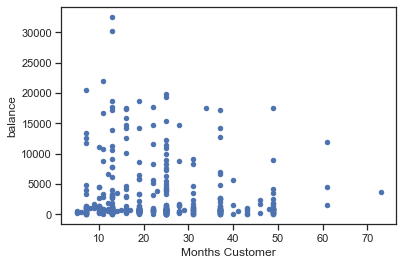

In [233]:
credit_df1.plot.scatter(x='Months Customer', y='balance')

In [235]:
#The Pearson Correlation
np.corrcoef(months, balance)[0, 1]

-0.06121000781711817

Q4. Compute the correlation between i) Age and months employed; ii) age and combined checking and saving account balance; iii)the number of months as a customer and amount of money in the bank. Interpret your results to a layperson. 

In [236]:
credit_df1.columns

Index(['Loan Purpose', 'Checking ', 'Savings', 'Months Customer',
       'Months Employed', 'Gender', 'Marital Status', 'Age', 'Housing',
       'Years', 'Job', 'Credit Risk', 'balance'],
      dtype='object')

In [244]:
corr1=np.corrcoef(credit_df1['Age'], credit_df1['Months Employed'])[0, 1]
print("the correlation between Age and months employed is ", corr1 )

the correlation between Age and months employed is  0.30679852918801265


In [243]:
corr2 = np.corrcoef(credit_df1['Age'], credit_df1['balance'])[0, 1]
print("the correlation between Age and combined checking and saving account balance is ", corr2 )

the correlation between Age and combined checking and saving account balance is  -0.02262464503547316


In [246]:
corr3= np.corrcoef(credit_df1['Months Customer'], credit_df1['balance'])[0, 1]
print("the correlation between the number of months as a customer and amount of money in the bank is ", corr3 )


the correlation between the number of months as a customer and amount of money in the bank is  -0.06121000781711817


Correlation refers to a technique used to measure the relationship between two or more variables. When two things are correlated, it means that they vary together.Positive correlation means that high scores on one are associated with high scores on the other, and that low scores on one are associated with low scores on the other. Negative correlation, on the other hand, means that high scores on the first thing are associated with low scores on the second. Negative correlation also means that low scores on the first are associated with high scores on the second. 

Generally speacking, 
we can see the abosolute value of Correlation Coefficient to interpret the value. 

| Correlation Coefficient(absolute value) | Interpretation        |
| --------------------------------------- | --------------------- |
| up to \|0.2\|                           | very low correlation  |
| up to \|0.5\|                           | low correlation       |
| up to \|0.7\|                           | moderate correlation  |
| up to \|0.9\|                           | high correlation      |
| above \|0.9\|                           | very high correlation |


- The correlation between *Age* and *months employed* is 0.30679852918801265. <br>
    So, we can think that these two values have low correlation.<br><br>

- The correlation between *Age* and *combined checking and saving account balance* is  -0.02262464503547316<br>
    So, we can think that these two values have nearly little correlation.<br><br>

- The correlation between *the number of months as a customer* and *amount of money* in the bank is  -0.06121000781711817
    So, we can think that these two values have nearly little correlation.<br><br>

Q5.Number the rows in the Excel file *Credit Risk Data* to identify each record. The bank wants to sample from this database to conduct a more detail audit. Find a simple random sample of 20 unique records. 

I will use inner function in Pandas Framework to smaple from *Credit Risk Data*.  

In [247]:
sample = credit_df1.sample(n=20)

In [248]:
sample

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk,balance
207,Business,2715,1435,49,14,M,Divorced,37,Own,2,Skilled,High,4150
416,Used Car,0,160,13,7,M,Married,40,Rent,4,Skilled,Low,160
131,Furniture,0,0,13,94,M,Single,48,Rent,4,Skilled,Low,0
61,New Car,0,667,29,10,M,Single,44,Own,2,Unskilled,High,667
368,Furniture,0,146,25,46,M,Single,26,Own,4,Skilled,High,146
220,Small Appliance,483,415,19,6,M,Married,32,Own,2,Skilled,High,898
113,Business,509,241,25,14,M,Single,35,Own,4,Unskilled,High,750
39,Small Appliance,0,323,49,42,M,Married,33,Own,1,Skilled,High,323
260,New Car,19812,0,25,37,M,Single,36,Own,2,Unskilled,High,19812
14,New Car,0,821,25,63,M,Single,44,Own,1,Skilled,High,821


Q6: Treating the records in the database as a population, use your sample from question 5): i) compute 95% and 99% confidence intervals for the total assets held in the bank by loan applicants. Explain the differences to a layperson as the level of confidence increases; ii) how do your confidence invervals differ if you assume that the population standard deviation is not known but estimated using your sample data. 

In [266]:
#To do some calculation, I have to import another python library called scipy
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt

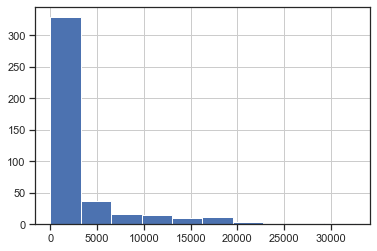

In [254]:
#population graph
hist = credit_df1['balance'].hist()

In [267]:
sample_balance = sample.balance

<h5> i ) I will use Z-test</h5>
We can use Z-test because of assumption that we know the population variance. <br>
But, I'm worrying about that the size of sample is so small.

In [275]:
confidence = [0.95, 0.99]
sample_size = 20
population_stv = credit_df1['balance'].std()
sample_mean = sample_balance.mean()

for i in confidence:    
    confidence = i
    z_critical = scipy.stats.norm.ppf(q = confidence + (1 - confidence) / 2)
    print('z-critical value:', z_critical)                     

    pop_stdev = population_stv
    margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
    confint = sample_mean - margin_of_error, sample_mean + margin_of_error

    print(confidence, 'Confidence interval:', confint)

z-critical value: 1.959963984540054
0.95 Confidence interval: (-133.13448009241574, 4097.834480092415)
z-critical value: 2.5758293035489004
0.99 Confidence interval: (-797.8678805360573, 4762.567880536057)


<h5>Explain the Confidence Interval</h5>
A Confidence Interval is a range of values we are fairly sure our true value lies in.<br>
Assume that we sample from the population, and calculate the confidence interval for 100 times. 

In 0.95 confidence interval, It is likely that 95 of the 100 confidence intervals will contain the real population mean. 

In 0.99 confidence interval, It is likely that 99 of the 100 confidence intervals will contain the real population mean. 

<h5> ii ) I will use t-test</h5>
We can use t-test because of assumption that we don't know the population variance. <br>
But, I'm worrying about that the population distribution is not Normal Distribution. 

In [276]:

from scipy.stats import t
from numpy import average, std
from math import sqrt

if __name__ == '__main__':
    data = sample_balance
    mean = average(data)
    # evaluate sample variance by setting delta degrees of freedom (ddof) to
    # 1. The degree used in calculations is N - ddof
    stddev = std(data, ddof=1)
    # Get the endpoints of the range that contains 95% of the distribution
    t_bounds = t.interval(0.95, len(data) - 1)
    # sum mean to the confidence interval
    ci = [mean + critval * stddev / sqrt(len(data)) for critval in t_bounds]
    print("Mean: %f" % mean)
    print("Confidence Interval 95%%: %f, %f" % (ci[0], ci[1]))
    
    data = sample_balance
    mean = average(data)
    # evaluate sample variance by setting delta degrees of freedom (ddof) to
    # 1. The degree used in calculations is N - ddof
    stddev = std(data, ddof=1)
    # Get the endpoints of the range that contains 95% of the distribution
    t_bounds = t.interval(0.99, len(data) - 1)
    # sum mean to the confidence interval
    ci = [mean + critval * stddev / sqrt(len(data)) for critval in t_bounds]
    print("Mean: %f" % mean)
    print("Confidence Interval 99%%: %f, %f" % (ci[0], ci[1]))
    

Mean: 1982.350000
Confidence Interval 95%: -141.148080, 4105.848080
Mean: 1982.350000
Confidence Interval 99%: -920.239261, 4884.939261


| BASIS FOR COMPARISON | T-TEST                                                       | Z-TEST                                                       |
| -------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Meaning              | T-test refers to a type of parametric test that is applied to identify, how the means of two sets of data differ from one another when variance is not given. | Z-test implies a hypothesis test which ascertains if the means of two datasets are different from each other when variance is given. |
| Based on             | Student-t distribution                                       | Normal distribution                                          |
| Population variance  | Unknown                                                      | Known                                                        |
| Sample Size          | Small                                                        | Large                                                        |



<h3>We played a gambling game in class: betting on the total value when two dice rolled.</h3>

1) If you were to participate in the game, what would you bet on? (2, 3..., 11, 12)<br>

 - Firstly, we have to know the possible cases. - To do this, I will make the roll_dice function to do a real game.<br> 
 - Second, we have to calculate the probability of each cases. 

Method 1)

We can also calculate the probability accurately. <br>
The number of the possible cases are 11(2, 3, ....., 12)<br>
From now, we have to calculate the probability of each cases. 

Case 2 = (1, 1)<br>
Case 3 = (1, 2), (2, 1)<br>
Case 4 = (1, 3), (2, 2), (3, 1)<br>
Case 5 = (1, 4), (2, 3), (3, 2), (4, 1)<br>
Case 6 = (1, 5), (2, 4), (3, 3), (4, 2), (5, 1)<br>
Case 7 = (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)<br>
Case 8 = (2, 6), (3, 5), (4, 4), (5, 3), (6, 2)<br>
Case 9 = (3, 6), (4, 5), (5, 4), (6, 3)<br>
Case 10 = (4, 6), (5, 5), (6, 4)<br>
Case 11 = (5, 6), (6, 5)<br>
Case 12 = (6, 6)<br><br>
*Total 36 Cases*<br>

Each Probabiliy <br>
Case 2 = 1/36<br>
Case 3 = 2/36 <br>
Case 4 = 3/36<br>
Case 5 = 4/36<br>
Case 6 = 5/36<br>
Case 7 = 6/36<br>
Case 8 = 5/36<br>
Case 9 = 4/36<br>
Case 10 = 3/36<br>
Case 11 = 2/36<br>
Case 12 = 1/36<br><br>

***So it is reasonable to bet on 7***

Method 2)

If I don't have to do it accurately, I can simulate dice game for 1,000,000 game, and draw the histogram plot. 
And then, I can choose where to bet.

In [294]:
import random 
import matplotlib.pyplot as plt
%matplotlib inline

dice_game_list = []
for i in range(0, 1000000):
    def roll_die():
        return random.randrange(1, 7)
    total = roll_die() + roll_die()
    dice_game_list.append(total)

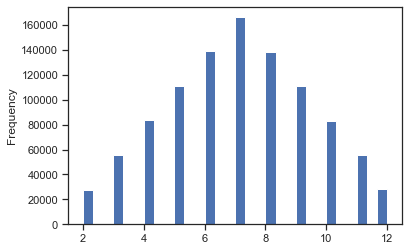

In [295]:
plt.hist(dice_game_list, bins=30)
plt.ylabel('Frequency');

***So, I will bet on 7***

2) What's the expeted return for each trial?(Assuming you pay 20 to join the game and you receive a 100 payoff if you win)

In [327]:
#make the probability variable. 
case_2 = float(1/36)
case_3 = float(2/36)
case_4 = float(3/36)
case_5 = float(4/36)
case_6 = float(5/36)
case_7 = float(6/36)
case_8 = float(5/36)
case_9 = float(4/36)
case_10 = float(3/36)
case_11 = float(2/36)
case_12 = float(1/36)

prob_list = [case_2, case_3, case_4, case_5, case_6, case_7, case_8, case_9,
            case_10, case_11, case_12]

In [328]:
sum=0;
for i in prob_list:
    sum=sum+(1/11)*(i*8000+(1-i)*(-2000))
    print(sum)

-156.56565656565655
-287.8787878787879
-393.93939393939394
-474.7474747474747
-530.3030303030303
-560.6060606060606
-616.1616161616162
-696.969696969697
-803.030303030303
-934.3434343434343
-1090.9090909090908


In [329]:
sum

-1090.9090909090908

Q3) What's the probability we observe what we've observe in class?(i.e, No7s in 10 trials)

First, I have to count the number of total cases<br>
2~12 : 11 cases<br>
In each trial, one of these 11 cases can be shown. <br>
But, the important thing to consider is that we cannot calculate the probability as (1/11)^(the number of tirals). Because we don't have to consider the order!<br> 



Q4)What's the most valuable takeaway for you from this game?

The calculated probability cannot guarantee that if I do a real trial, I could get the result. <br>
In our class, we got 7 too much. It is also different from calculated probaility of getting 7(just 1/6). 